In [1]:
import numpy as np

In [2]:
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
def fit_and_plot_model(df, model):
    #splitting input features and target variable
    features = df.drop('y',axis = 1)
    target = df.y
    #fitting the model
    model.fit(features, target)
    #plotting the graphs
    plt.scatter(df.x , df.y)#scatter plot for the training points
    plt.plot(df.x,model.predict(features),'m--')#predicted linear model
    
    plt.show()
    #returning the model
    return model
def fit_and_plot_polynomial_model(df,model,poly =1):
    if poly == 1:
        return fit_and_plot_model(df,model)
    elif poly>1:
        df_copy = df.copy()
        for i in range(2,poly+1):
            df_copy['x'+str(i)]=np.power(df.x,i)
        return fit_and_plot_model(df_copy,model)
    else:
        pass

In [11]:
def engineer_polynomial_features(df, max_polynomial = 1):
    df_copy = df.copy()
    
    if max_polynomial == 1:
        return df_copy
    elif max_polynomial > 1:
        for i in range(2,max_polynomial+1):
            df_copy['x'+str(i)]=np.power(df.x,i)
        return df_copy
    else:
        pass
def fit_and_plot_polynomial_model(df,model,max_polynomial=1):
    df_e = engineer_polynomial_features(df,max_polynomial)
    features = df_e.drop('y',axis = 1)
    target = df_e.y
    #fitting the model
    model.fit(features, target)
    #plotting the graphs
    plt.scatter(df_e.x , df_e.y)#scatter plot for the training points
    plt.plot(df_e.x,model.predict(features),'m--')#predicted linear model
    
    plt.show()
        
        

In [9]:
df = pd.read_csv('simulated_data.csv')

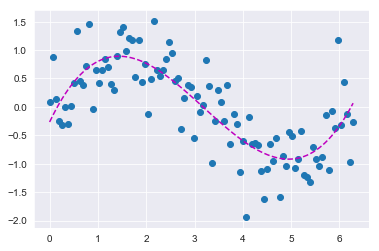

In [16]:
fit_and_plot_polynomial_model(df,LinearRegression(),3)

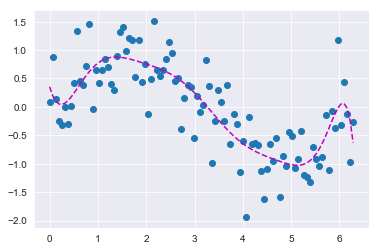

In [17]:
fit_and_plot_polynomial_model(df,LinearRegression(),10)

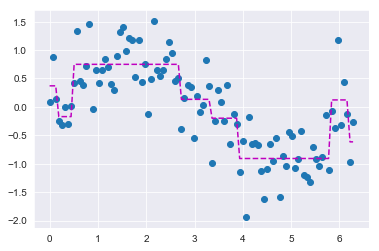

In [18]:
fit_and_plot_polynomial_model(df,DecisionTreeRegressor(max_depth = 3),3)

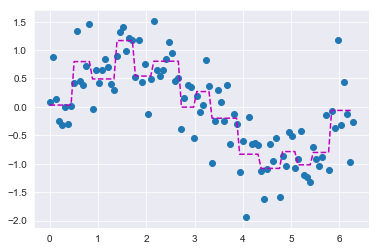

In [20]:
fit_and_plot_polynomial_model(df,DecisionTreeRegressor(max_depth=10,min_samples_leaf=5),3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


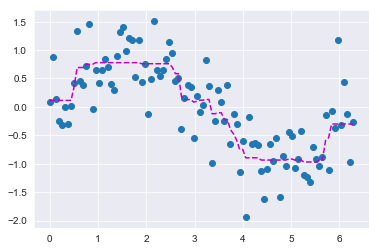

In [22]:
fit_and_plot_polynomial_model(df,RandomForestRegressor(random_state=123,max_depth=3,min_samples_leaf=5),3)